In [39]:
using Falcons
using Condor
using Healpix
using Plots

In [41]:
ss = gen_ScanningStrategy()

day = 60 * 60 * 24
year = day * 365

ss.nside = 128
ss.sampling_rate = 1 #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 46.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

1-element Vector{Int64}:
 0

In [52]:
theta_tod, phi_tod, psi_tod, alpha_tod, pix_tod = get_pointings_theta_phi_psi_alpha_pix_tod(ss, 0, 100);

In [61]:
l_range = [0,200]

2-element Vector{Int64}:
   0
 200

In [62]:
lmax = 3ss.nside-1 
npix = nside2npix(ss.nside)
alm = rand(ComplexF64, 3, numberOfAlms(lmax,lmax))
blm = rand(ComplexF64, 3, numberOfAlms(lmax,lmax))

3×73920 Matrix{ComplexF64}:
   0.733536+0.484079im  0.0179186+0.0619265im  …  0.572826+0.356903im
   0.781174+0.458561im   0.175065+0.776392im        0.1491+0.12738im
 0.00862106+0.14239im    0.481167+0.284495im      0.484566+0.319859im

In [63]:
tod = @time tod_convolution_idalhwp(alm, blm, lmax, npix, l_range, theta_tod[:,1], phi_tod[:,1], psi_tod[:,1],alpha_tod[:,1]);

 12.432094 seconds (550.31 k allocations: 2.401 GiB, 1.75% gc time)


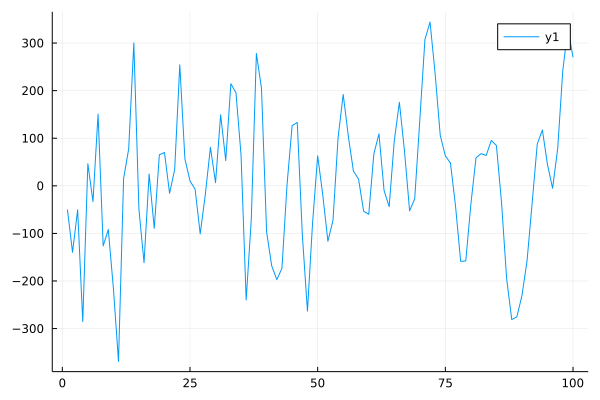

In [64]:
plot(tod)